<a href="https://colab.research.google.com/github/Ethan830/RL-Autonomous-Vehicles/blob/main/CS325_Proj5_MountainCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_12_4_atari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Deep RL: Q-Learning, DQN, and PPO
* [Eugene Agichtein](https://www.cs.emory.edu/~eugene/) for CS325: Artificial Intelligence
* Adapted from [Jeff Heaton](https://sites.wustl.edu/jeffheaton/)

# Google CoLab Setup

The following code ensures that Google CoLab is running the correct version of TensorFlow, and has the necessary Python libraries installed.

In [ ]:
# HIDE OUTPUT
try:
    from google.colab import drive
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

if COLAB:
  !pip install stable-baselines3[extra] gymnasium
  !pip install gymnasium[accept-rom-license,atari]
  !pip install pyvirtualdisplay
  !sudo apt-get install -y python-opengl ffmpeg
  !sudo apt-get install -y xvfb

Note: using Google CoLab
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-c

# Q-Learning in Gymnasium
Gymnasium: https://gymnasium.farama.org/ is a more general and realistic virtual universe with many environments, such as robotic control, video games, and 3-d physics.

Out of the box, Q-Learning does not deal with continuous inputs, such as a car's accelerator that can range from released to fully engaged. Additionally, Q-Learning primarily deals with discrete actions, such as pressing a joystick up or down. For now, we will apply regular Q-Learning to the Mountain Car problem from Gymnasium

## Introducing the Mountain Car

This section will demonstrate how Q-Learning can create a solution to the mountain car gym environment. The Mountain car is an environment where a car must climb a mountain. Because gravity is stronger than the car's engine, it cannot merely accelerate up the steep slope even with full throttle. The vehicle is situated in a valley and must learn to utilize potential energy by driving up the opposite hill before the car can make it to the goal at the top of the rightmost hill.

First, it might be helpful to visualize the mountain car environment. The following code shows this environment.

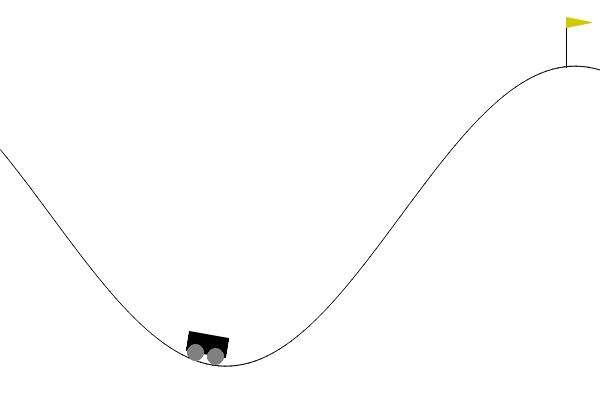

In [ ]:
import gymnasium as gym
from PIL import Image

# Create and initialize the MountainCar environment
env = gym.make('MountainCar-v0', render_mode="rgb_array")
env.reset()

# Render the environment's state to a numpy array
frame = env.render()

# Convert the numpy array to an image and display it
image = Image.fromarray(frame)

# Don't forget to close the environment when you're done!
env.close()

display(image)

The mountain car environment provides the following discrete actions:

* 0 - Apply left force
* 1 - Apply no force
* 2 - Apply right force

The mountain car environment Observations are made up of the following continuous values:

* state[0] - Position
* state[1] - Velocity

The car is not strong enough. It will need to use potential energy from the mountain behind it. The following code shows an agent that applies full throttle to climb the hill.

In [ ]:
import gym
import gymnasium as gymnasium
from gymnasium.wrappers import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import numpy as np

# Start virtual display
display = Display(visible=0, size=(1400, 900))
display.start()

# Create Mountain Car environment
env = gymnasium.make('MountainCar-v0', render_mode="rgb_array")
env.metadata['render_fps'] = 30
# Reset the environment
env.reset()

# Setup the wrapper to record the video
video_callable=lambda episode_id: True
env = RecordVideo(env, video_folder='./videos_mcar', episode_trigger=video_callable)

# Run the environment until done

truncated = False
i=0
while not truncated:
  i+=1
  action = 2
  state, reward, terminated, truncated , info = env.step(action)
  #print(f"Step {i}: State={state}, Reward={reward}, term={terminated}, trunc={truncated}, info={info}")

env.close()


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos_mcar folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [ ]:

# Display the video
video = io.open(glob.glob('videos_mcar/*.mp4')[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))

IndexError: list index out of range

Several hyperparameters are very important for Q-Learning. These parameters will likely need adjustment as you apply Q-Learning to other problems. Because of this, it is crucial to understand the role of each parameter.

* **LEARNING_RATE** The rate at which previous Q-values are updated based on new episodes run during training.
* **DISCOUNT** The amount of significance to give estimates of future rewards when added to the reward for the current action taken. A value of 0.95 would indicate a discount of 5% on the future reward estimates.
* **EPISODES** The number of episodes to train over. Increase this for more complex problems; however, training time also increases.
* **SHOW_EVERY** How many episodes to allow to elapse before showing an update.
* **DISCRETE_GRID_SIZE** How many buckets to use when converting each continuous state variable. For example, [10, 10] indicates that the algorithm should use ten buckets for the first and second state variables.
* **START_EPSILON_DECAYING** Epsilon is the probability that the agent will select a random action over what the Q-Table suggests. This value determines the starting probability of randomness.
* **END_EPSILON_DECAYING** How many episodes should elapse before epsilon goes to zero and no random actions are permitted. For example, EPISODES//10  means only the first 1/10th of the episodes might have random actions.

In [ ]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 1000 #set to >=600 to ensure training works for this problem

DISCRETE_GRID_SIZE = [10, 10]
START_EPSILON_DECAYING = 0.5
END_EPSILON_DECAYING = EPISODES//10

We lets create the discrete buckets for state and build Q-table.

> Add blockquote





In [ ]:
env = gymnasium.make("MountainCar-v0")

epsilon = 1
epsilon_change = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)
buckets = (env.observation_space.high - env.observation_space.low) \
    / DISCRETE_GRID_SIZE
q_table = np.random.uniform(low=-3, high=0, size=(DISCRETE_GRID_SIZE
                                                  + [env.action_space.n]))
success = False

Now lets setup Q-learning!

Q-Learning Implementation: Discretizing input and actions

In [ ]:
import numpy as np

# This function converts the floating point state values into
# discrete values. This is often called binning.  We divide
# the range that the state values might occupy and assign
# each region to a bucket.
def calc_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/buckets
    return tuple(discrete_state.astype(int))

# Run one game.  The q_table to use is provided.  We also
# provide a flag to indicate if the game should be
# rendered/animated.  Finally, we also provide
# a flag to indicate if the q_table should be updated.
def run_game(q_table, render, should_update):
    done = False
    discrete_state = calc_discrete_state(env.reset()[0])
    success = False

    while not done:
        # Exploit or explore
        if np.random.random() > epsilon:
            # Exploit - use q-table to take current best action
            # (and probably refine)
            action = np.argmax(q_table[discrete_state])
        else:
            # Explore - t
            action = np.random.randint(0, env.action_space.n)

        # Run simulation step
        new_state, reward, done, _, _ = env.step(action)

        # Convert continuous state to discrete
        new_state_disc = calc_discrete_state(new_state)

        # Have we reached the goal position (have we won?)?
        if new_state[0] >= env.unwrapped.goal_position:
            success = True

        # Update q-table
        if should_update:
            max_future_q = np.max(q_table[new_state_disc])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * \
                (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_state_disc

        if render:
            env.render()

    return success


Run the training!

In [ ]:
episode = 0
success_count = 0

# Loop through the required number of episodes
while episode < EPISODES:
    episode += 1
    done = False

    # Run the game.
    success = run_game(q_table, False, True)

    # Count successes
    if success:
        success_count += 1

    # Move epsilon towards its ending value, if it still needs to move
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon = max(0, epsilon - epsilon_change)

print(success)



```
# This is formatted as code
```

Now lets test the trained agent

In [ ]:
# HIDE OUTPUT

# Setup the wrapper to record the video
env = gymnasium.make("MountainCar-v0", render_mode="rgb_array")
video_callable=lambda episode_id: True
env = RecordVideo(env, video_folder='./videos_mcar', episode_trigger=video_callable)

run_game(q_table, True, False)

# Display the video
video = io.open(glob.glob('videos_mcar/*.mp4')[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))

## Inspecting the Q-Table

We can also display the Q-table. The following code shows the agent's action for each environment state. As the weights of a neural network, this table is not straightforward to interpret. Some patterns do emerge in that direction, as seen by calculating the means of rows and columns. The actions seem consistent at both velocity and position's upper and lower halves.

In [ ]:
import pandas as pd

df = pd.DataFrame(q_table.argmax(axis=2))

df.columns = [f'v-{x}' for x in range(DISCRETE_GRID_SIZE[0])]
df.index = [f'p-{x}' for x in range(DISCRETE_GRID_SIZE[1])]
df

## Training the DQN Agent

Great! we are done with basic Q-Learning. However, its not going to scale to larger/more complex environments.

We are now ready to train the DQN, which is like Q-Learning, but the Q values are estimated using a neural network. Depending on how many episodes you wish to run through, this process can take many hours. This code will update both the loss and average return as training occurs. As training becomes more successful, the average return should increase. The losses reported reflecting the average loss for individual training batches.

Creating policies for large state spaces is a task that Deep Q-Learning Networks (DQN) can usually handle. Neural networks can generalize these states and learn commonalities. Unlike a table, a neural network does not require the program to represent every combination of state and action. A DQN maps the state to its input neurons and the action Q-values to the output neurons. The DQN effectively becomes a function that accepts the state and suggests action by returning the expected reward for each possible action.

To implement DQN and other algorithms, we can use the Stable Baselines library. It is designed for ease of use, offering a straightforward API to implement, experiment with, and extend upon cutting-edge RL methods.

In [ ]:
import gymnasium as gym
import torch as th
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

# Create and initialize the MountainCar environment
env = gym.make('MountainCar-v0', render_mode="rgb_array")
time_step = env.reset()
print('Time step:')
print(time_step)

action = 1

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)
# Instantiate the agent
#We can specify the network architecture for fully connected networks (MLPs)
policy_net = dict(activation_fn=th.nn.ReLU, net_arch=[128]) #1 hidden layers, 128 neurons each
dqn = DQN("MlpPolicy", env, verbose=1,
          policy_kwargs=policy_net,
          learning_rate=0.001, gamma=1, batch_size=128)

In [ ]:
# Train the agent
dqn.learn(total_timesteps=2e4) #can be very large for big problems to hopefully succeed
#however, DQN is known not to work well for this problem...

# Save the agent
dqn.save("dqn_mcar")

In [ ]:
# Create a fresh environment for evaluation
eval_env = gym.make('MountainCar-v0')

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(dqn, eval_env, n_eval_episodes=10)

print(f"Mean reward: {mean_reward} +/- {std_reward}")

## Visualize actions

visulaize the mountain ageint and save in a video.

In [ ]:
# Setup the wrapper to record the video
env = gymnasium.make("MountainCar-v0", render_mode="rgb_array")
video_callable=lambda episode_id: True
video_env = RecordVideo(env, video_folder='./videos_mcar_dqn', episode_trigger=video_callable)

# Run the environment until done

truncated = False
terminated=False
i=0
obs, info = video_env.reset()
while not truncated and (not terminated):
    action, _ = dqn.predict(obs, deterministic=True)
    obs, reward, terminated, truncated , info = video_env.step(action)
video_env.close()

# Display the video
video = io.open(glob.glob('videos_mcar_dqn/*.mp4')[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))

## PPO Policy

However, DQN is not the best we can do. In particular, direct policy optimization, e.g., with Actor-Critic models, can be more effective, and is the only approach possible with continuous action outpus.  PPO is a variant of Actor-Critic where policies are optimized within particular "trust region".
See lecture slides for details.

Conveniently, Stable baselines implements these models!

In [ ]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
import base64
from IPython import display as ipythondisplay
from pathlib import Path

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecFrameStack


env = gymnasium.make("MountainCar-v0", render_mode="rgb_array")

In [ ]:
# Initialize the agent, here we use Proximal Policy Optimization (PPO)
policy_net = dict(activation_fn=th.nn.ReLU, net_arch=[64,64]) #2 hidden layers, 64 neurons each
ppo = PPO('MlpPolicy', env, verbose=1,
          policy_kwargs=policy_net,
          learning_rate=0.001, gamma=0.99, batch_size=128)


In [ ]:
# Train the agent
TIMESTEPS = 1e5
ppo.learn(total_timesteps=TIMESTEPS)

# Save the model
ppo.save(f"mcar_ppo_model")

# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(ppo, env, n_eval_episodes=10)

print(f"Mean reward: {mean_reward} +/- {std_reward}")

# Don't forget to close the environment when you are done
env.close()

Lets watch the agent drive

In [ ]:
# Setup the wrapper to record the video
#env = gymnasium.make("MountainCar-v0", render_mode="rgb_array")
env = gymnasium.make("MountainCar-v0", render_mode="rgb_array")
video_callable=lambda episode_id: True
video_env = RecordVideo(env, video_folder='./videos_mcar_ppo', episode_trigger=video_callable)

# Record the environment
video_folder = '/content/videos_mcar_ppo'
obs, info = video_env.reset()

# Run the environment until done


done = False
while not done:
    action, _states = ppo.predict(obs, deterministic=True)
    obs, rewards, done, truncated, info = video_env.step(action)
    env.render()
env.close()

# Display the video
video = io.open(glob.glob('videos_mcar_ppo/*.mp4')[0], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))


The end! you now know how to train Q-Learning agents, DQN agents and Policy Network agents in Gymnasium. Onwards to the main assignment